# Introduction
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Importing & Loading the dataset

In [2]:
data=pd.read_csv("loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.drop(['Loan_ID'], axis = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset Info:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Dataset Shape:

In [7]:
data.shape

(614, 13)

In [8]:
#To describe categorical columns
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Data Cleaning
Checking the Missing Values

In [9]:
#Preprocessing the dataset
#find the null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# First we will fill the Missing Values by the 'Mean' & 'Mode' of the respective variables.

In [10]:
#for categorical columns use to fillup the values using mode 
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [11]:
#fill the mising values for numerical terms-mean
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

# Let's check the Missing values for the final time!

In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Now, Let's check the final Dataset Shape

In [13]:
data.shape

(614, 13)

# Exploratory Data Analyis
Comparison between Parameters in getting the Loan:

<AxesSubplot:xlabel='Gender', ylabel='count'>

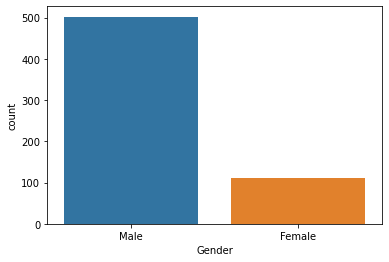

In [14]:
sns.countplot(data['Gender'])

# observation:
From the results above, the number of male applicants is higher compared to female applicants.

<AxesSubplot:xlabel='Married', ylabel='count'>

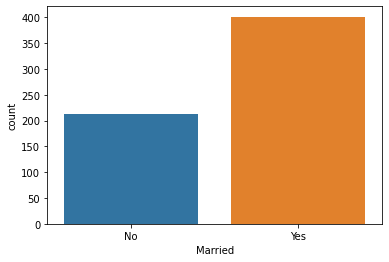

In [15]:
sns.countplot(data['Married'])

# observation:
The number of applicants that has been married is higher compared to applicants that hasn't married.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

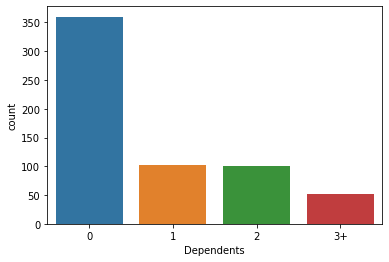

In [16]:
sns.countplot(data['Dependents'])


<AxesSubplot:xlabel='Education', ylabel='count'>

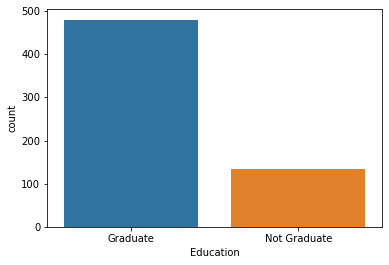

In [17]:
sns.countplot(data['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

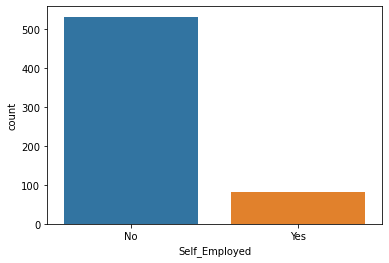

In [18]:
sns.countplot(data['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

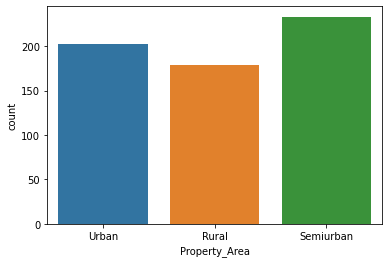

In [19]:
sns.countplot(data['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

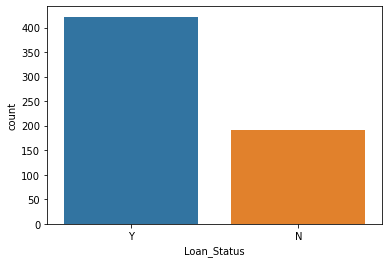

In [20]:
sns.countplot(data['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

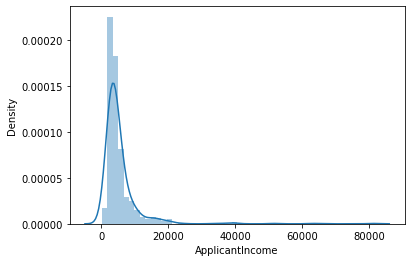

In [21]:
sns.distplot(data['ApplicantIncome'])

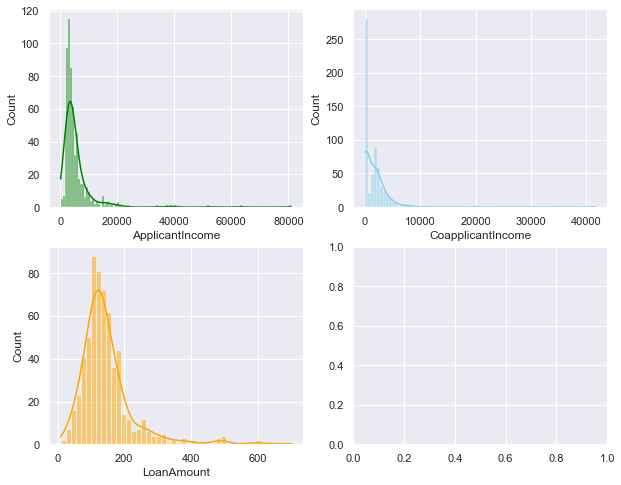

In [22]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');


# observation:
The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers.
The distribution of Loan Amount Term is negativly skewed and it has outliers.

<AxesSubplot:>

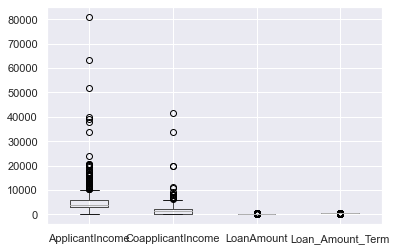

In [23]:
#draw a boxplot to check the outliers
data.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                     'Loan_Amount_Term'])

#'As we can see that ApplicantIncome and CoapplicantIncome columns has large Standard Deviation and more outliers.\nwhile LoanAmount and Loan_Amount_Term columns has less Standard Deviation and less outliers.'

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

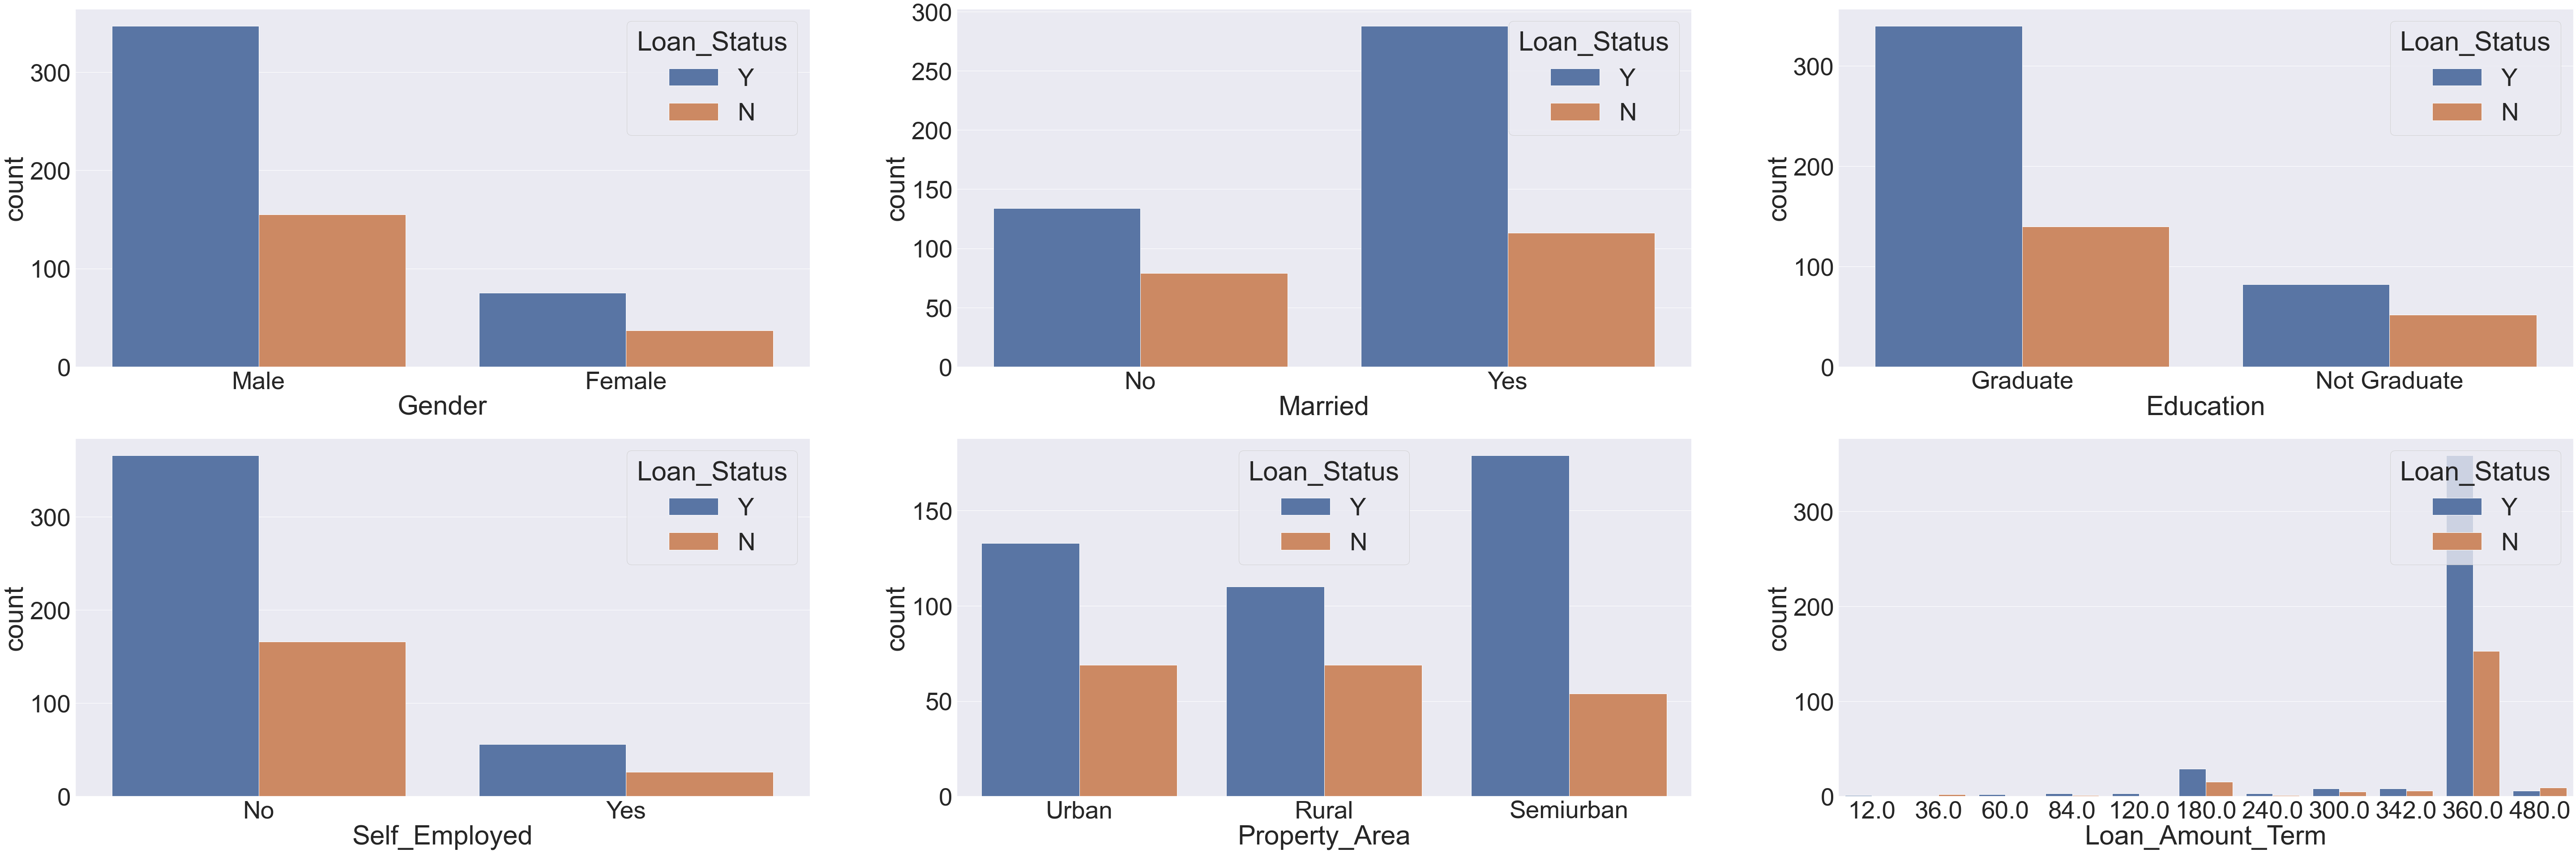

In [24]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(data['Gender'],hue=data['Loan_Status'])

plt.subplot(332)
sns.countplot(data['Married'],hue=data['Loan_Status'])

plt.subplot(333)
sns.countplot(data['Education'],hue=data['Loan_Status'])

plt.subplot(334)
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])

plt.subplot(335)
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])

plt.subplot(336)
sns.countplot(data['Loan_Amount_Term'],hue=data['Loan_Status'])

# Observation:
From the above plot I can conclude that, About 2/3 of applicants have granted loan. There are more number of male as compared to that of female. Also married applicants are more likely to granted loans. Majority of the population have zero dependents are also likely to accepted the loans. The above plot also conclude that majority of the applicants belongs from Semi-urban and are likely to grant loans.The majority of the loan has been taken are for 360 months.

In [25]:
corr=data.corr()
corr


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


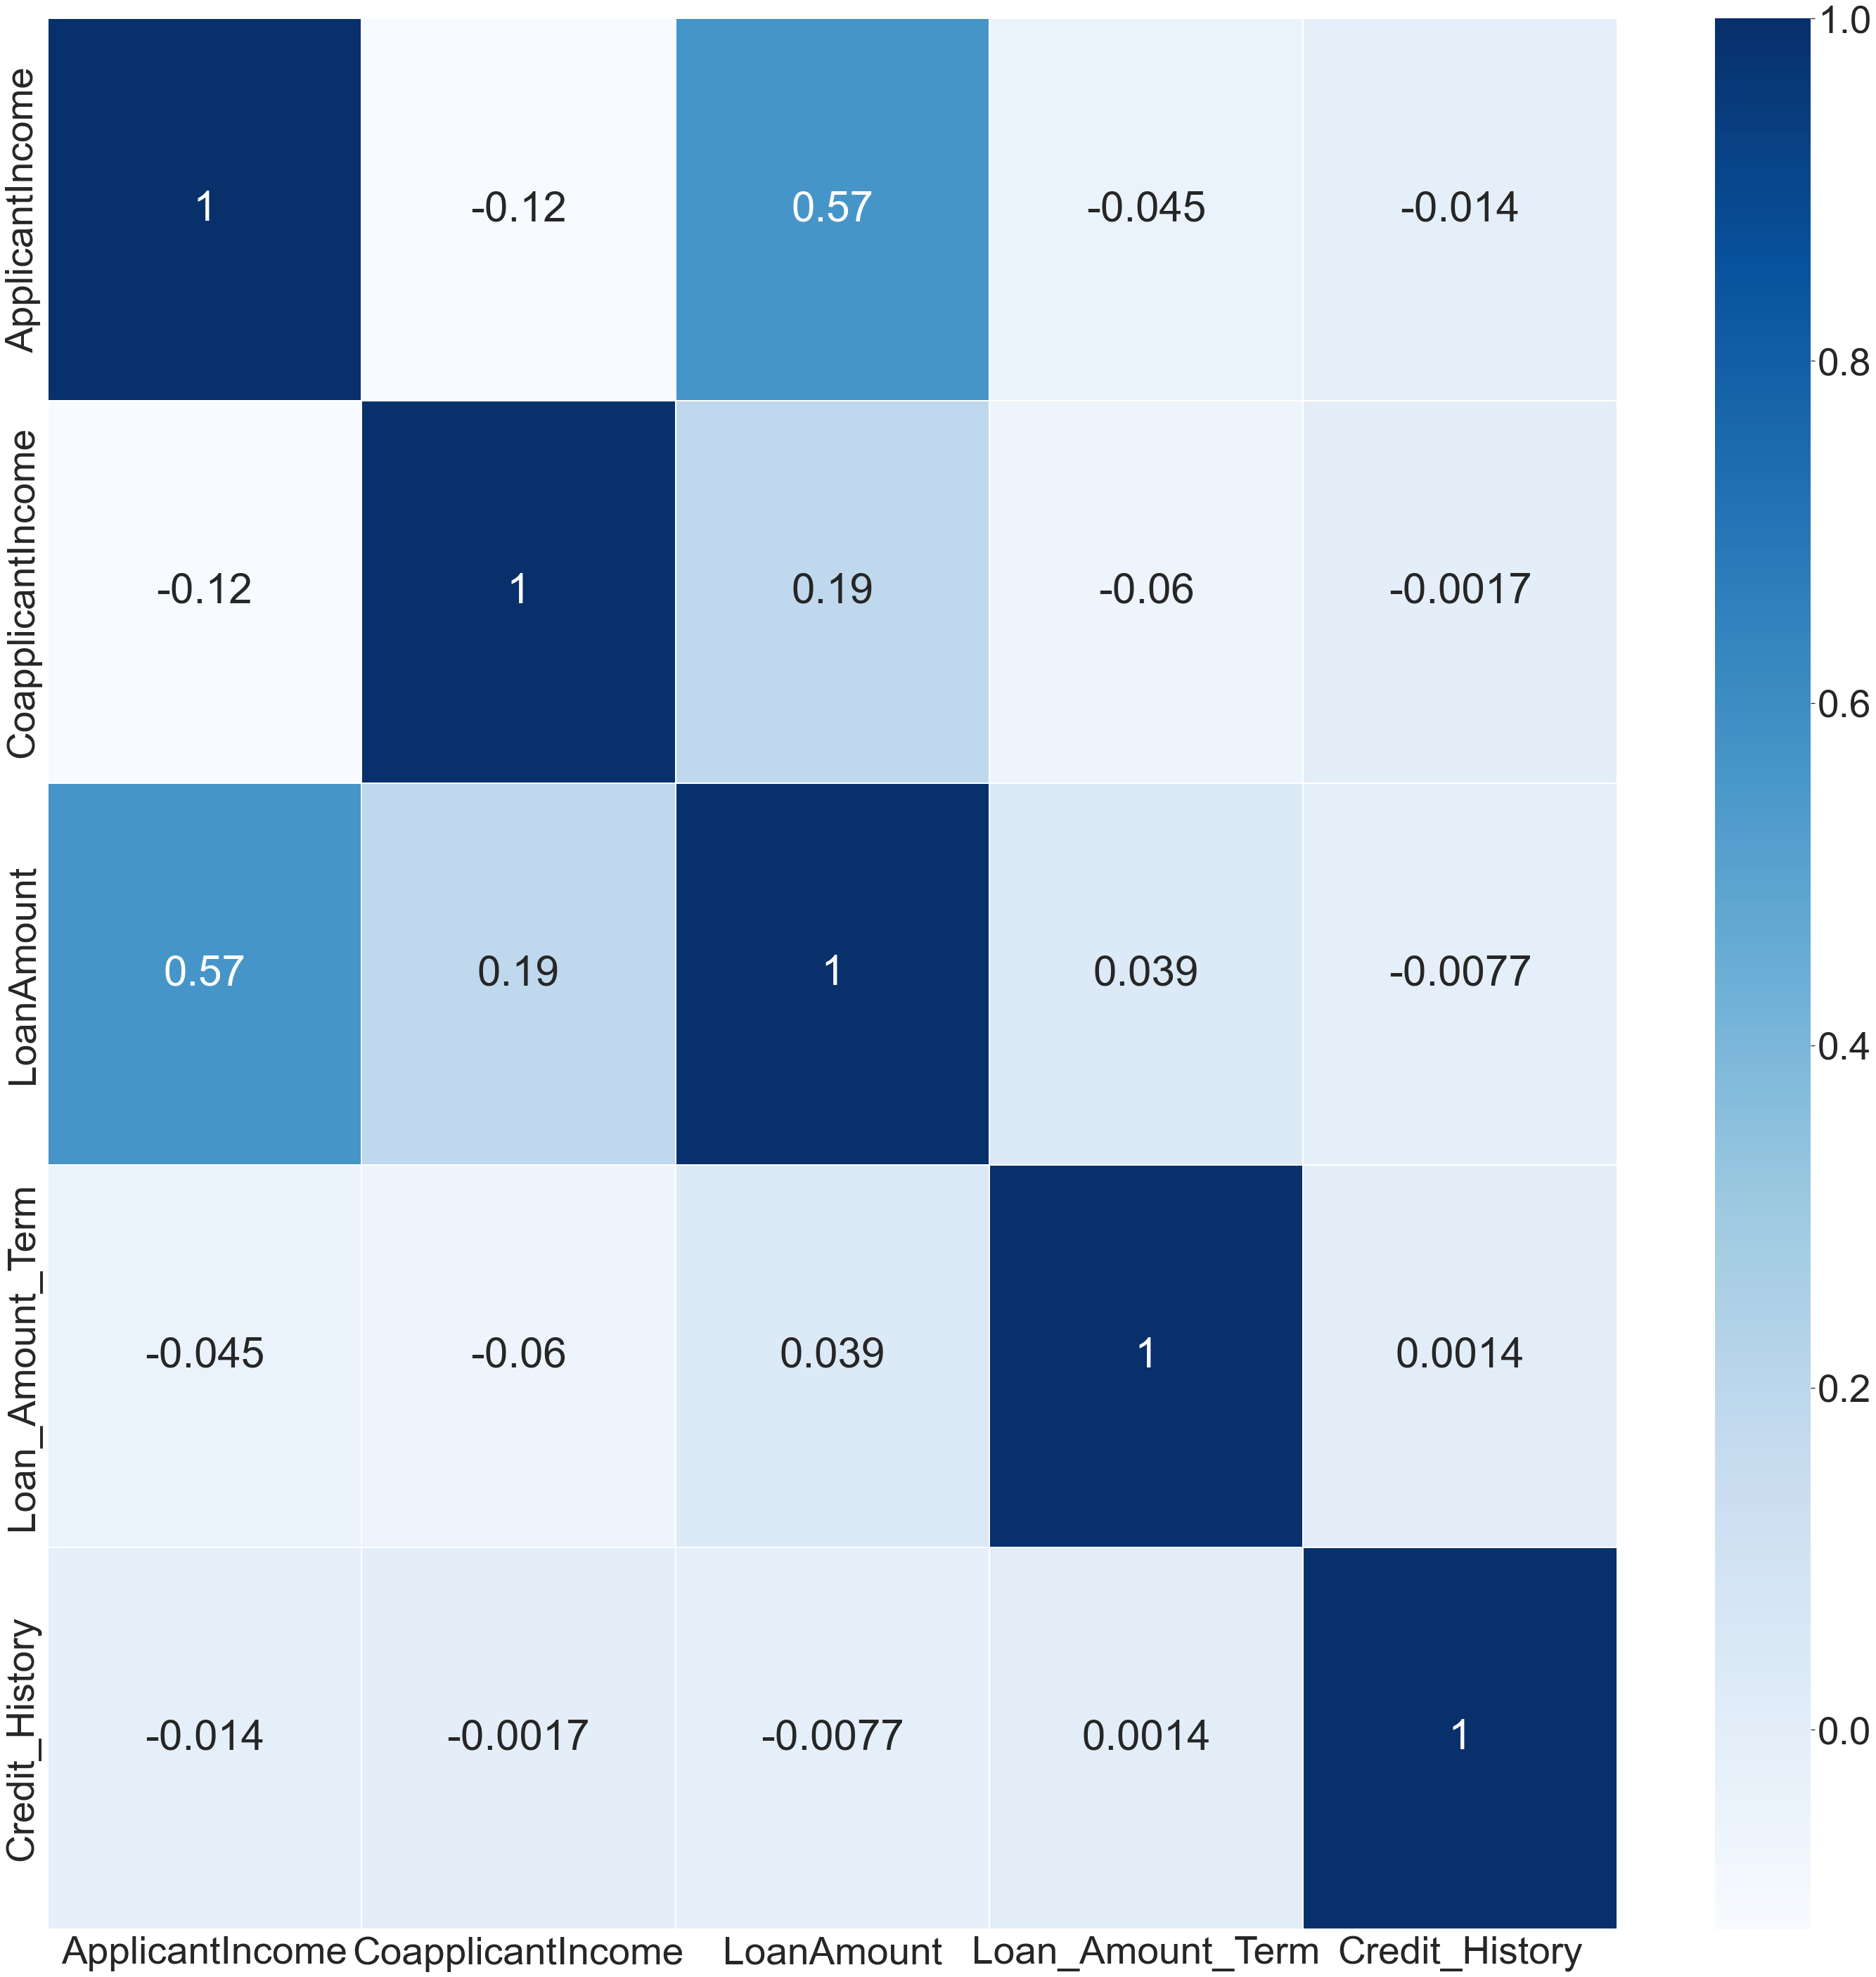

In [26]:
fig, ax = plt.subplots(figsize=(50,50))

sns.heatmap(data=data.corr(),annot=True, linewidths=0.2, cmap='Blues')
plt.show()

# observation:
In the above heatmap, the most correlate variables are( ApplicantIncome_loanAmount) and (Credit_History_Loan_Status). Loan Amount is Correlated with ApplicantIncome.

# Let's replace the Variable values to Numerical form & display the Value Counts

In [27]:
data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)
data.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
data.replace({"Married":{"No":0,"Yes":1}},inplace=True)
data.replace({"Self_Employed":{"No":0,"Yes":1}},inplace=True)
data.replace({"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)
data.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [28]:
data=data.replace(to_replace='3+',value=4)


In [29]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [30]:
data.drop(['Loan_ID'], axis = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


# Splitting the data into Train and Test set.

In [31]:
#feature extraction
x=data.iloc[:,1:12]
y=data.iloc[:,-1]

In [32]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [33]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Importing Packages for Classification algorithms

In [34]:
#getting into training /testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

# Logistic Regression (LR)
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

In [35]:
from sklearn.model_selection import train_test_split
#create a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [36]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [37]:
LR_predicted=model.predict(xtest)
LR_predicted

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [38]:
#checking score on training data
model.score(xtrain,ytrain)

0.8065268065268065

In [39]:
#checking score for testing data
model.score(xtest,ytest)

0.8108108108108109

In [40]:
from sklearn.metrics import *
print(confusion_matrix(ytest,LR_predicted))
print(classification_report(ytest,LR_predicted))

[[ 25  32]
 [  3 125]]
              precision    recall  f1-score   support

           0       0.89      0.44      0.59        57
           1       0.80      0.98      0.88       128

    accuracy                           0.81       185
   macro avg       0.84      0.71      0.73       185
weighted avg       0.83      0.81      0.79       185



# Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [41]:
print('The accuracy of logistic regression is:',metrics.accuracy_score(ytest,LR_predicted))
print("The accuracy of logistic regression is: %s%%" % (100*accuracy_score(ytest,LR_predicted)))

The accuracy of logistic regression is: 0.8108108108108109
The accuracy of logistic regression is: 81.08108108108108%


# Conclusion:
The Loan Status is heavily dependent on the Credit History for Predictions. The Logistic Regression algorithm gives us the maximum Accuracy (81% approx) compared to the other 3 Machine Learning Classification Algorithms.

# K-Nearest Neighbors
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [43]:
xtrain.shape

(429, 11)

In [44]:
ytrain.shape

(429,)

In [45]:
xtest.shape

(185, 11)

In [46]:
ytest.shape

(185,)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    model= KNeighborsClassifier(n_neighbors = i)

In [48]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=20)

In [49]:
KN_result=model.predict(xtest)

In [50]:
model.score(xtrain,ytrain)

0.6923076923076923

In [51]:
model.score(xtest,ytest)

0.6864864864864865

In [52]:
from sklearn.metrics import *
print(confusion_matrix(ytest,KN_result))

[[  4  47]
 [ 11 123]]


In [53]:
print(classification_report(ytest,KN_result))

              precision    recall  f1-score   support

           0       0.27      0.08      0.12        51
           1       0.72      0.92      0.81       134

    accuracy                           0.69       185
   macro avg       0.50      0.50      0.47       185
weighted avg       0.60      0.69      0.62       185



In [54]:
print('The accuracy of K-Nearest Neighbors is:',metrics.accuracy_score(ytest,KN_result))
print("The accuracy of K-Nearest Neighbors is: %s%%" % (100*accuracy_score(ytest,KN_result)))

The accuracy of K-Nearest Neighbors is: 0.6864864864864865
The accuracy of K-Nearest Neighbors is: 68.64864864864865%


# Decision Tree Classifier
Decision tree are powerful classification algorithm that are becoming increasing more popular with the growth of data mining in the field of information systems. In the literature there are so many popular decision tree algorithms like ID3, C4.5, C5 etc. As the name implies, this technique recursively separates observations in branches to construct a tree for the purpose of improving the prediction accuracy. In doing so, they use mathematical algorithms like information gain, Gini index to identify a variable and corresponding threshold for the variable that splits the input observation into two or more subgroups. This step is repeated at each leaf node until the complete tree is conducted. The objective of the splitting pair that maximizes the homogeneity of the resulting two or more subgroup samples.

In [55]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [56]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [57]:
DT_result=model.predict(xtest)

In [58]:
model.score(xtrain,ytrain)

1.0

In [59]:
model.score(xtest,ytest)

0.7621621621621621

In [60]:
from sklearn.metrics import *
print(confusion_matrix(ytest,DT_result))

[[ 27  24]
 [ 20 114]]


In [61]:
print(classification_report(ytest,DT_result))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        51
           1       0.83      0.85      0.84       134

    accuracy                           0.76       185
   macro avg       0.70      0.69      0.69       185
weighted avg       0.76      0.76      0.76       185



In [62]:
print('The accuracy of decision tre is:',metrics.accuracy_score(DT_result,ytest))
print("The accuracy of Decision Tree is: %s%%" % (100*accuracy_score(ytest,DT_result)))

The accuracy of decision tre is: 0.7621621621621621
The accuracy of Decision Tree is: 76.21621621621621%


# Support Vector Machine 
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [63]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [64]:
filename = 'linear_svm_model.p'

model = SVC(kernel='linear')
model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred, ytest)))
print(confusion_matrix(ytest, y_pred))
print("Classification Report for Linear Kernel SVM")
print(classification_report(ytest, y_pred))

Accuracy: 81.08108108108108%
[[ 18  33]
 [  2 132]]
Classification Report for Linear Kernel SVM
              precision    recall  f1-score   support

           0       0.90      0.35      0.51        51
           1       0.80      0.99      0.88       134

    accuracy                           0.81       185
   macro avg       0.85      0.67      0.69       185
weighted avg       0.83      0.81      0.78       185



In [65]:
print('The accuracy of Support Vector Machine is:',metrics.accuracy_score(ytest, y_pred))
print("The accuracy of Support Vector Machine is : %s%%" % (100*accuracy_score(y_pred, ytest)))

The accuracy of Support Vector Machine is: 0.8108108108108109
The accuracy of Support Vector Machine is : 81.08108108108108%


# Observation:
    The accuracy of Support Vector Machine is : 81.08108108108108%
    The accuracy of logistic regression is: 81.08108108108108%
    The accuracy of Decision Tree is: 76.21621621621621%    
    The accuracy of K-Nearest Neighbors is: 68.64864864864865%